Optical forces above substrate
=========================================

<span style="color: red;">**!!Attention!!**:</span> *pyGDM2-retard* is still in beta version and is to be used with caution.

*Example authors: Peter Wiecha & Clément Majorel*  *(field gradients code by C. Majorel; retarded propagator by G. Colas des Francs)*


In this example, we calculate the optical force on a dielectric nano-cube close to a dielectric surface, trying to reproduce the physics reported by *Chaumet & Nieto-Vesperinas* [1].
This example requires the extension package *pyGDM2-retard* (https://pypi.org/project/pyGDM2-retard/).
It can be installed via pip:

<code>pip install -U pyGDM2-retard
</code>


[1]: Chaumet & Nieto-Vesperinas: *Coupled dipole method determination of the electromagnetic force on a particle over a flat dielectric substrate* **PRB** 61, 14119-14127 (2000) (https://journals.aps.org/prb/abstract/10.1103/PhysRevB.61.14119)

In [1]:
import time
import copy

import numpy as np
import matplotlib.pyplot as plt

from pyGDM2 import fields
from pyGDM2 import tools
from pyGDM2 import structures
from pyGDM2 import core
from pyGDM2 import linear
from pyGDM2 import visu
from pyGDM2 import visu3d
from pyGDM2 import materials
from pyGDM2 import propagators

## the external package for the retarded Green's Dyads
from pyGDM2_retard import propagators_retarded


setup the simulation
----------------------------------

In [2]:
## --- Setup environment
n3 = 1.0   # top (environment)
n2 = 1.5  # cladding
n1 = 1.5   # substrate
spacing = 0   # thickness of 'n2' layer

## quasistatic approximation (pyGDM2 default)
dyads = propagators.DyadsQuasistatic123(n1=n1, n2=n2, n3=n3, spacing=spacing)

## retarded dyads
dyads_retard = propagators_retarded.DyadsRetard123(n1=n1, n2=n2, n3=n3, spacing=spacing)


## --- incident field
field_generator = fields.plane_wave
kwargs = dict(inc_angle=0, E_p=1, E_s=0)   ## normal incidence from below, x-polarization
wavelengths = [633.]
efield = fields.efield(field_generator, wavelengths=wavelengths, kwargs=kwargs)


## --- Setup geometry (dielectric nano-cube with 200nm side length)
mesh = 'cube'
step = 25     # for the paper a smaller step was used
material = materials.dummy(n=1.5)
geo = structures.rect_wire(step, L=200//step, H=200//step, W=200//step, mesh=mesh)
print("Nr of dipoles", len(geo))
base_struct = structures.struct(step, geo, material)
    

gap_list = np.arange(10, 1000, 40)
all_F = []
all_F_r = []
for gap in gap_list:
    print("\ncalc. gap {:.1f}nm...".format(gap))
    
    ## shift base structure on Z by `gap`
    struct = base_struct.copy() + [0, 0, gap-step/4]
    
    ## --- setup simulations
    sim = core.simulation(struct, efield, dyads)           # quasistatic
    sim_r = core.simulation(struct, efield, dyads_retard)  # with retard
    
    ## --- run scatter simulation and calc. force
    sim.scatter()
    sim_r.scatter()
    
    F_tot = linear.optical_force(sim, field_index=0)
    F_tot_r = linear.optical_force(sim_r, field_index=0)
    
    all_F.append(F_tot)
    all_F_r.append(F_tot_r)


all_F = np.array(all_F)
all_F_r = np.array(all_F_r)

Nr of dipoles 512
structure initialization - automatic mesh detection: cube
structure initialization - consistency check: 512/512 dipoles valid

calc. gap 10.0nm...
timing for wl=633.00nm - setup: EE 1648.0ms, inv.: 165.1ms, repropa.: 508.1ms (1 field configs), tot: 2321.5ms
identification of identical tensors: 0.55s
sorting:                             0.26s
indexing of unique tensors:          0.04s
calculating   3375 retarded tensors: 0.78s (working on 12 processes)
reconstruction of coupling matrix:   0.12s
timing for wl=633.00nm - setup: EE 2097.4ms, inv.: 309.1ms, repropa.: 12.9ms (1 field configs), tot: 2419.8ms


/home/hans/.local/lib/python3.8/site-packages/pyGDM2/linear.py:1179: UserWarning: Optical force calculation is a beta-functionality and still under testing. Please use with caution.
  warnings.warn("Optical force calculation is a beta-functionality and still under testing. " +



calc. gap 50.0nm...
timing for wl=633.00nm - setup: EE 64.5ms, inv.: 281.9ms, repropa.: 13.4ms (1 field configs), tot: 360.3ms
identification of identical tensors: 0.03s
sorting:                             0.26s
indexing of unique tensors:          0.04s
calculating   3375 retarded tensors: 0.71s (working on 12 processes)
reconstruction of coupling matrix:   0.02s
timing for wl=633.00nm - setup: EE 1380.7ms, inv.: 205.0ms, repropa.: 13.2ms (1 field configs), tot: 1599.3ms

calc. gap 90.0nm...
timing for wl=633.00nm - setup: EE 63.3ms, inv.: 157.9ms, repropa.: 18.4ms (1 field configs), tot: 239.7ms
identification of identical tensors: 0.03s
sorting:                             0.26s
indexing of unique tensors:          0.04s
calculating   3375 retarded tensors: 0.67s (working on 12 processes)
reconstruction of coupling matrix:   0.01s
timing for wl=633.00nm - setup: EE 1346.5ms, inv.: 173.1ms, repropa.: 13.0ms (1 field configs), tot: 1532.8ms

calc. gap 130.0nm...
timing for wl=633.00

timing for wl=633.00nm - setup: EE 62.3ms, inv.: 154.8ms, repropa.: 12.9ms (1 field configs), tot: 230.2ms
identification of identical tensors: 0.03s
sorting:                             0.26s
indexing of unique tensors:          0.04s
calculating   3375 retarded tensors: 0.58s (working on 12 processes)
reconstruction of coupling matrix:   0.01s
timing for wl=633.00nm - setup: EE 1250.0ms, inv.: 161.6ms, repropa.: 13.1ms (1 field configs), tot: 1424.9ms

calc. gap 770.0nm...
timing for wl=633.00nm - setup: EE 61.1ms, inv.: 292.5ms, repropa.: 13.1ms (1 field configs), tot: 366.9ms
identification of identical tensors: 0.03s
sorting:                             0.26s
indexing of unique tensors:          0.04s
calculating   3375 retarded tensors: 0.57s (working on 12 processes)
reconstruction of coupling matrix:   0.01s
timing for wl=633.00nm - setup: EE 1241.5ms, inv.: 163.7ms, repropa.: 13.0ms (1 field configs), tot: 1418.3ms

calc. gap 810.0nm...
timing for wl=633.00nm - setup: EE 62.0m

normalization
----------------------------------

We normalize to the force on the cube at very large distance.


In [3]:
## --- reference sim. with large gap for normalization
struct_inf = base_struct.copy() + [0, 0, 100000]
sim_inf = core.simulation(struct_inf, efield, dyads)
sim_inf.scatter()

## calc. force
F_vac = linear.optical_force(sim_inf, field_index=0)

timing for wl=633.00nm - setup: EE 62.0ms, inv.: 190.7ms, repropa.: 13.1ms (1 field configs), tot: 266.1ms


plot the optical force
--------------------------------

Now we plot the z-component of the force as function of the inter-particle distance.
Note that the relative behvior of the force is the same as in reference [1].

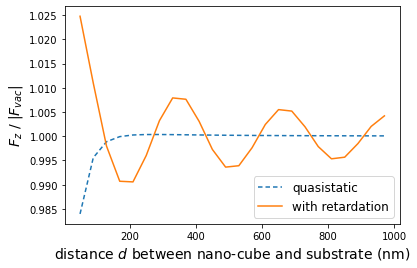

In [4]:
plt.figure()

plt.plot(gap_list[1:], all_F.T[2][1:]/np.linalg.norm(F_vac), label='quasistatic', dashes=[3,2])
plt.plot(gap_list[1:], all_F_r.T[2][1:]/np.linalg.norm(F_vac), label='with retardation')

plt.legend(fontsize=12, loc=4)
plt.xlabel('distance $d$ between nano-cube and substrate (nm)', fontsize=14)
plt.ylabel(u'$F_z$ / $|F_{vac}|$', fontsize=14)

plt.show()